
# Project: Investigate a Dataset (Investigating TMDB Movie Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
### Dataset Description
>In this report I will be investigating a Movie Dataset by TMDb (The Movie Database ) which is a collection of movie and TV shows information that is heavily supported by its readers . This data set contains information on more than 10,000 movies collected from The Movie Database (TMDb). The dataset has 21 columns including;

#### Attributes/Features and Description
id -Unique identifier of the movie

imdb_id -Unique identifier of the movie by Imdb

popularity -how much the movie is well liked and known by people

budget -Cost of the movie production

revenue -The total movie earnings

original_title -The name of the movie

cast -Actors taking part in a play

homepage -A direct link to the movie's website, that includes features like the movie trailer and social media pages

director -The person who oversees the movie production activity

tagline -The movie slogan that gives a general idea of what the movie is about

keywords -Main concepts in the movie

overview -A general summary of what the movie is about

runtime -Total duration of a movie

genres -Movie category based on its general narrative events or plot of the story

production companies - The company or organization that produces the movie

release_date -The date the movie is available to the public

vote_count -The number of votes for a particular movie

vote_average -The mean number of votes

release_year -The year the movie was released

budget_adj -Cost of the movie production in terms of 2010 dollars, accounting for inflation over time.

revenue_adj -The total movie earnings in terms of 2010 dollars, accounting for inflation over time.

#### Questions for Analysis¶
Are movies with high popularity likely to generate more revenue ?

Which genre has the overall highest revenue ?

What are the top 10 movies with the highest revenue ?

In [2]:
# importing necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [3]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

ERROR: Could not find a version that satisfies the requirement pandas==0.25.0
ERROR: No matching distribution found for pandas==0.25.0


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [4]:
# Loading data

df=pd.read_csv('tmdb-movies.csv')
#   types and look for instances of missing or possibly errant data.

df.head(1)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [5]:
#dimensions of the dataframe 
df.shape 

(10866, 21)

In [6]:
#datatypes of the columns
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [7]:
#let us display a concise summary of the dataframe,
# including the number of non-null values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [8]:
# this returns useful descriptive statistics for each column of data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [9]:
# this returns the number of unique values in each column
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64


### Data Cleaning 
##### Dropping Columns 

In [10]:
# proceeding to drop columns we will not use 
df.drop(['homepage', 'overview', 'tagline','imdb_id', 'budget', 'revenue', 'vote_count', 'release_date', 'keywords'], axis=1, inplace=True)

In [11]:
df.head()

,id,popularity,original_title,cast,director,runtime,genres,production_companies,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,7.3,2015,1.747999e+08,1.385749e+09


The above columns were removed for the following reasons;
>Homepage; Each movie has its own homepage thus cannot be used to compare different rows

>Overview; Each movie has its own overview thus cannot be used to compare different rows

>Tagline; Each movie has its own tagline thus cannot be used to compare different rows

>Imdb_id; Some rows are missing the Imbdb_id so it cannot be used as a unique identifier

>Budget; I opted to use the adjusted budget instead as it is more recent

>Revenue; I opted to use the adjusted revenue instead as it is more recent

>Vote_Count; These are dependent on the number of voters thus using the vote average would be better standardized

>Release Date; I opted to use year to analyze time variant

#### Null Values

In [12]:
#checking for rows with missing values 

df.isnull().sum()

id                         0
popularity                 0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [13]:
#dropping null values
df.dropna(inplace=True)

In [14]:
# checks if any of columns still have null values - should print False
df.isnull().sum().any()

False

>We have found that the columns cast, director, genres and production companies have missing values ( 76, 44, 23 and 1030 respectively ) and we therefore proceed to drop them to ease analyze data as a  whole 

#### Removing Duplicates

In [15]:
#removing duplicate row
df.drop_duplicates(inplace=True)

>We have  proceeded to remove duplicate rows

In [16]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


<a id='eda'></a>
## Exploratory Data Analysis



>We shall begin by randomly exploring the distibution of data in columns such as vote_average distibution and run time distribution to have an idea of how the data looks like

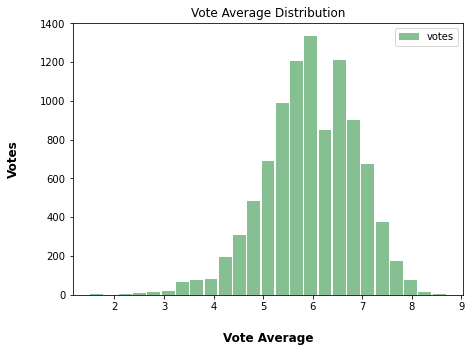

In [17]:
#histogram for vote average distibution

ax = df.hist(column='vote_average', bins=25, grid=False, figsize=(7,5), color='#86bf91', zorder=2, rwidth=0.9, label= 'votes')

ax = ax[0]
for x in ax:
    #  title
    x.set_title("Vote Average Distribution")

    # Set x-axis label
    x.set_xlabel("Vote Average", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Votes", labelpad=20, weight='bold', size=12)
    x.legend();
    

> From the above diagram, we are able to see the distribution of the average votes, with the most score being approximately 6 

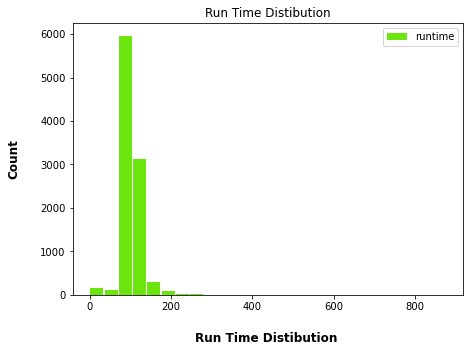

In [18]:
ax = df.hist(column='runtime', bins=25, grid=False, figsize=(7,5), color='#6ce50e', zorder=2, rwidth=0.9, label='runtime')

ax = ax[0]
for x in ax:
    # title
    x.set_title("Run Time Distibution")

    # Set x-axis label
    x.set_xlabel("Run Time Distibution ", labelpad=20, weight='bold', size=12)
    # Set y-axis label
    x.set_ylabel("Count", labelpad=20, weight='bold', size=12)
    x.legend();


  

> From the above graph we can see that most of the movies have a runtime of about 100 minutes 

> We shall also look at the trends of runtime per year using a line graph as shown below

In [52]:
df.groupby(['release_year'])['runtime'].mean()

release_year
1960    110.656250
1961    119.866667
1962    125.833333
1963    111.323529
1964    111.195122
1965    119.294118
1966    108.590909
1967    109.416667
1968    110.540541
1969    110.310345
1970    113.075000
1971    107.727273
1972    103.027027
1973    103.527273
1974    108.659091
1975    107.714286
1976    109.956522
1977    108.327273
1978    111.573770
1979    112.625000
1980    108.424658
1981    105.064103
1982    104.037500
1983    104.389610
1984    104.868687
1985    109.433962
1986    102.165138
1987    102.318584
1988    104.037879
1989    106.250000
1990    105.880952
1991    105.768000
1992    108.182540
1993    107.744186
1994    107.850575
1995    108.335294
1996    106.336735
1997    107.594444
1998    104.774869
1999    107.650943
2000    104.750000
2001    108.990566
2002    106.518672
2003    100.818898
2004    103.632411
2005    104.470588
2006    101.937143
2007    101.028278
2008    100.430839
2009     98.810127
2010     99.695238
2011     98.442982

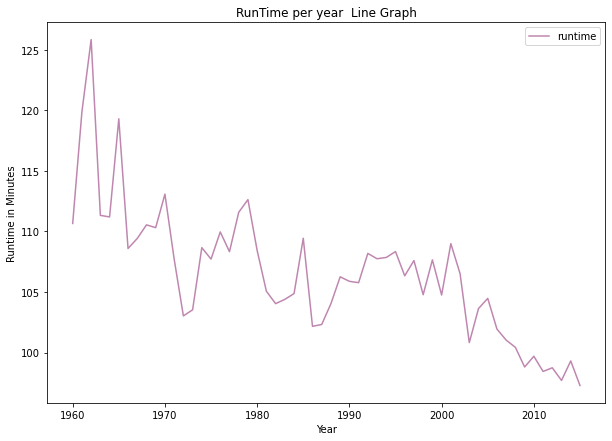

In [50]:
runtime_yearwise= df.groupby(['release_year'])['runtime'].mean()
runtime_yearwise.plot(kind='line',  color='#BF86AF', figsize=(10,7))
plt.title('RunTime per year  Line Graph')
plt.ylabel('Runtime in Minutes')
plt.xlabel('Year')
plt.legend();

> From the above graph we can see that with time the runtime has been reducing drastically, hence movies are now shorter than they were before 

#### Defining a Correlation Coefficient formula 

In [57]:
def  corr  ( column1 , column2 ) : 
    r =  (((column1 - column1.mean()) / column1.std()) * ((column2 - column2.mean()) / column2.std())).mean() 
    return r

>An example , We can use the above formula to find the correlation coefficient between Revenue_adj and Budget_adj 

In [58]:
corr ( df.revenue_adj , df.budget_adj )

0.640786146015924

>The correlation between the Revenue and the vote_average can be calculated as per below 

In [59]:
corr ( df.revenue_adj , df.vote_average )

0.21464646935423606

### Research Question 1 : Is Popularity associated with High Revenue ?

For this question, we compare the average popularity level with the average revenue 

 Popularity is given in a quantitative form, make it difficult to categorize thi data, hence we can create our own categories using the describe function to find our cutting points. 

In [20]:
# View the min, 25%, 50%, 75%, max popularity values with Pandas describe
df.describe().popularity

count    9772.000000
mean        0.694721
std         1.036931
min         0.000188
25%         0.232710
50%         0.419762
75%         0.776408
max        32.985763
Name: popularity, dtype: float64

In [21]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [0.000188, 0.232710, 0.419762, 0.776408,32.985763] 

In [22]:
# Labels for the four popularity level groups
bin_names = ['low', 'medium','high','very_high']

In [23]:
df['popularity_level'] = pd.cut(df['popularity'], bin_edges, labels=bin_names)

In [24]:
# Checks for successful creation of this column
df.head()

,id,popularity,original_title,cast,director,runtime,genres,production_companies,vote_average,release_year,budget_adj,revenue_adj,popularity_level
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015,1.379999e+08,1.392446e+09,very_high
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,7.1,2015,1.379999e+08,3.481613e+08,very_high
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,6.3,2015,1.012000e+08,2.716190e+08,very_high
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,7.5,2015,1.839999e+08,1.902723e+09,very_high
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,7.3,2015,1.747999e+08,1.385749e+09,very_high


After create these four categories, we can use groupby to get the mean popularity rating for each level.

In [25]:
# Find the mean Revenue of each popularity level with groupby
df.groupby('popularity_level').mean().revenue_adj


popularity_level
low          6.110326e+06
medium       1.192705e+07
high         3.207122e+07
very_high    1.781063e+08
Name: revenue_adj, dtype: float64

>We can proceed to visualize the relationship between populaty and revenue generated 

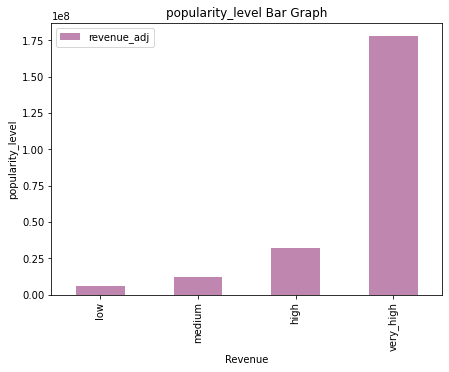

In [26]:
Popularity_revenue = df.groupby('popularity_level').mean().revenue_adj.sort_values()
Popularity_revenue.plot(kind='bar',  color='#BF86AF', figsize=(7,5))
plt.title('popularity_level Bar Graph')
plt.ylabel('popularity_level')
plt.xlabel('Revenue')
plt.legend(); 

> From the above graph we can see that the higher the popularity level, the higher the movie revenue 

### Research Question 2 : Which movie genre has the highest revenue ?

>The genre column contains multiple values separated by pipe (|) characters. To analyze the column we need to separate the genres for each movie and put them in their own row, since 1 movie can have multiple genres. As at now, the genre column has 2039 unique values which can be reduced using the steps below.

In [27]:
#convert the genre column which is a string into a list 
df['genres'] = df['genres'].str.split('|')

In [28]:
df.head()

,id,popularity,original_title,cast,director,runtime,genres,production_companies,vote_average,release_year,budget_adj,revenue_adj,popularity_level
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,"[Action, Adventure, Science Fiction, Thriller]",Universal Studios|Amblin Entertainment|Legenda...,6.5,2015,1.379999e+08,1.392446e+09,very_high
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,"[Action, Adventure, Science Fiction, Thriller]",Village Roadshow Pictures|Kennedy Miller Produ...,7.1,2015,1.379999e+08,3.481613e+08,very_high
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,"[Adventure, Science Fiction, Thriller]",Summit Entertainment|Mandeville Films|Red Wago...,6.3,2015,1.012000e+08,2.716190e+08,very_high
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,"[Action, Adventure, Science Fiction, Fantasy]",Lucasfilm|Truenorth Productions|Bad Robot,7.5,2015,1.839999e+08,1.902723e+09,very_high
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,"[Action, Crime, Thriller]",Universal Pictures|Original Film|Media Rights ...,7.3,2015,1.747999e+08,1.385749e+09,very_high


In [29]:
df_gen = df.genres.apply(pd.Series)
df_gen.head()

,0,1,2,3,4
0,Action,Adventure,Science Fiction,Thriller,NaN
1,Action,Adventure,Science Fiction,Thriller,NaN
2,Adventure,Science Fiction,Thriller,NaN,NaN
3,Action,Adventure,Science Fiction,Fantasy,NaN
4,Action,Crime,Thriller,NaN,NaN


> We have created a separate table of genres only 

In [30]:
#join both the tables using Merge
df_gen=df.merge(df_gen, left_index=True, right_index = True)
df_gen.head()

,id,popularity,original_title,cast,director,runtime,genres,production_companies,vote_average,release_year,budget_adj,revenue_adj,popularity_level,0,1,2,3,4
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,"[Action, Adventure, Science Fiction, Thriller]",Universal Studios|Amblin Entertainment|Legenda...,6.5,2015,1.379999e+08,1.392446e+09,very_high,Action,Adventure,Science Fiction,Thriller,NaN
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,"[Action, Adventure, Science Fiction, Thriller]",Village Roadshow Pictures|Kennedy Miller Produ...,7.1,2015,1.379999e+08,3.481613e+08,very_high,Action,Adventure,Science Fiction,Thriller,NaN
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,"[Adventure, Science Fiction, Thriller]",Summit Entertainment|Mandeville Films|Red Wago...,6.3,2015,1.012000e+08,2.716190e+08,very_high,Adventure,Science Fiction,Thriller,NaN,NaN
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,"[Action, Adventure, Science Fiction, Fantasy]",Lucasfilm|Truenorth Productions|Bad Robot,7.5,2015,1.839999e+08,1.902723e+09,very_high,Action,Adventure,Science Fiction,Fantasy,NaN
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,"[Action, Crime, Thriller]",Universal Pictures|Original Film|Media Rights ...,7.3,2015,1.747999e+08,1.385749e+09,very_high,Action,Crime,Thriller,NaN,NaN


In [31]:
#pivot genres from columns into rows
df_gen=df_gen.melt(id_vars=['id','popularity','original_title','cast','director','runtime','genres','production_companies','vote_average','release_year','budget_adj','revenue_adj','popularity_level'],value_name="genre")
df_gen.head(1)

,id,popularity,original_title,cast,director,runtime,genres,production_companies,vote_average,release_year,budget_adj,revenue_adj,popularity_level,variable,genre
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,"[Action, Adventure, Science Fiction, Thriller]",Universal Studios|Amblin Entertainment|Legenda...,6.5,2015,1.379999e+08,1.392446e+09,very_high,0,Action


>Since Genre values are in columns instead of rows, we pivot these values so that now they are in rows instead of columns as shown

In [32]:
#remove unnecessary columns
df_gen.drop(['genres','variable'],axis=1,inplace=True)
df_gen.head()

,id,popularity,original_title,cast,director,runtime,production_companies,vote_average,release_year,budget_adj,revenue_adj,popularity_level,genre
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015,1.379999e+08,1.392446e+09,very_high,Action
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Village Roadshow Pictures|Kennedy Miller Produ...,7.1,2015,1.379999e+08,3.481613e+08,very_high,Action
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Summit Entertainment|Mandeville Films|Red Wago...,6.3,2015,1.012000e+08,2.716190e+08,very_high,Adventure
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Lucasfilm|Truenorth Productions|Bad Robot,7.5,2015,1.839999e+08,1.902723e+09,very_high,Action
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Universal Pictures|Original Film|Media Rights ...,7.3,2015,1.747999e+08,1.385749e+09,very_high,Action


In [33]:
#removing rows with null values
df_gen.dropna(inplace=True)
df_gen.shape

(24647, 13)

We remove the initial 'genres' row and the 'variable' row that created when we used the melt() function.

In [34]:
#displaying the total revenue for each genre
df_gen.groupby('genre').sum().revenue_adj

genre
Action             2.186066e+11
Adventure          2.082414e+11
Animation          5.953321e+10
Comedy             1.814423e+11
Crime              7.667539e+10
Documentary        1.112954e+09
Drama              1.921169e+11
Family             1.078018e+11
Fantasy            1.018289e+11
Foreign            2.229048e+08
History            1.601051e+10
Horror             3.936368e+10
Music              1.902425e+10
Mystery            4.114336e+10
Romance            8.242227e+10
Science Fiction    1.068414e+11
TV Movie           5.838910e+07
Thriller           1.605913e+11
War                1.889625e+10
Western            7.606709e+09
Name: revenue_adj, dtype: float64

From the above we can see the listed genre and the corresponding expenditure

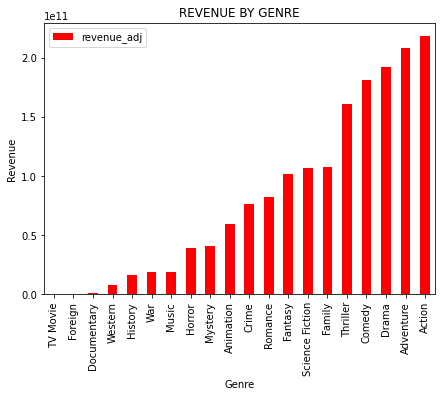

In [35]:
#plotting a bar graph showing the revenue by genre 
Genre_revenue = df_gen.groupby('genre').sum().revenue_adj.sort_values()
Genre_revenue .plot(kind='bar',  color='r', figsize=(7,5))
plt.title('REVENUE BY GENRE')
plt.ylabel('Revenue')
plt.xlabel('Genre')
plt.legend(); 

> From the above graph, we are able to see in ascending order, the movie genres that garner the most revenue, with the highest being Action movies and the lowest being TV movies 

# Research Question 3 : Which top 10 movies have the highest revenue of all time ?

Here we shall select the top 10 movies based on the value of their corresponding revenue

In [36]:
top_10_movies_by_revenue = df.sort_values(by = ['revenue_adj'],ascending = False)[['original_title','revenue_adj']].head(10)
top_10_movies_by_revenue.reset_index(drop=True,inplace=True)
top_10_movies_by_revenue.set_index('original_title',inplace=True)
top_10_movies_by_revenue

,revenue_adj
original_title,
Avatar,2.827124e+09
Star Wars,2.789712e+09
Titanic,2.506406e+09
The Exorcist,2.167325e+09
Jaws,1.907006e+09
Star Wars: The Force Awakens,1.902723e+09
E.T. the Extra-Terrestrial,1.791694e+09
The Net,1.583050e+09
One Hundred and One Dalmatians,1.574815e+09


From the above table we are able to deduce the top 10 movies and their corresponding total revenue 

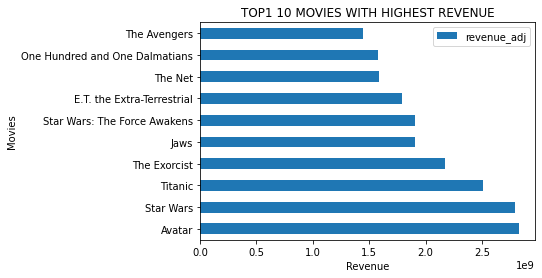

In [37]:
#plotting a bar graph of the  top 10 movies against their revenue 
top_10_movies_by_revenue.plot(kind='barh')
plt.title('TOP1 10 MOVIES WITH HIGHEST REVENUE')
plt.ylabel('Movies')
plt.xlabel('Revenue');

> From the above graph we can conclude that the movie Avatar is the highest grossing movie, together with the other top 9 movies with the highest revenue within the timeline 

<a id='conclusions'></a>
## Conclusions

We can deduce from the Revenue by Popularity Bar Graph that a movie with a high popularity level is likely to generate high revenue. The lower the popularity, the lower the revenue generated. There is therefore a relationship between popularity and revenue.

Secondly, from the Revenue by Genre Bar Graph one can rank the highest revenue generating genre (Action) to the least (TV movie), making it an easy choice for production companies to select the highest earning genre. 

Lastly, the top 10 highest earning movies of all time can be displayed as above , with the first position going to the Avatar. Further analysis can be done on the specific attributes of these movies to see what makes them stand out as a whole


### Limitations 

> I have been able to get the total revenue per genre during the timeline given , however, we have seen that one movie can have several genres and we cannot be too sure as to what extent the specific genre can attribute to the revenue of that movie. In addition, some genres such as TV movie seem to generalized and can be placed in any other genre. It was also noted that some movies were missing the genre data which means the total revenue calculated may be innacurate to some extent. 

# References

>https://www.themoviedb.org/ 

>https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata 

>https://github.com/reemamohsin4/TMDb-Movie-Data/blob/master/Investigate_a_Dataset.ipynb